In [75]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import joblib
# 使用 warnings 过滤器来忽略特定类型的警告
warnings.filterwarnings("ignore", category=UserWarning)

In [76]:
# Load the data
data = np.load('DataSet/Time_Series_element_0.npz')

# 取900个测试
features = data['features'][0:3000, :]
Labels = data['labels']

print(features.shape, Labels.shape)

(3000, 72) (41740,)


In [77]:
def arima_forecast(time_series, split_ratio=0.8, order=(8,2,1)):
    # 切分数据集
    train_size = int(len(time_series) * split_ratio)
    train, test = time_series[:train_size], time_series[train_size:]

    # 建立和拟合ARIMA模型
    model = ARIMA(train, order=order)
    model_fit = model.fit()

    # 在测试集上进行预测
    predictions = model_fit.forecast(steps=len(test))

    # 计算评价指标
    mse = mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)

    # 绘制预测结果与实际数据的对比
    plt.figure(figsize=(10,5))
    plt.plot(range(len(train)), train, label='Train')
    plt.plot(range(len(train), len(train) + len(test)), test, label='Test')
    plt.plot(range(len(train), len(train) + len(test)), predictions, label='Predicted')
    plt.legend(loc='upper left')
    plt.title('ARIMA Forecast and Actual Data')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

    return model_fit, predictions, mse, mae

In [78]:
time_series = features[2]

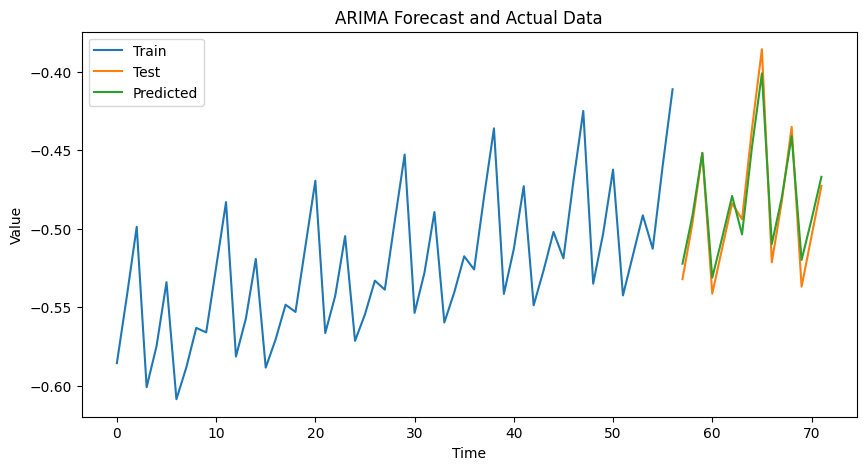

In [79]:
model_fit, predictions, mse, mae = arima_forecast(time_series)

In [80]:
# 保存模型
joblib.dump(model_fit, 'arima_model.pkl')

# 加载模型
loaded_model = joblib.load('arima_model.pkl')

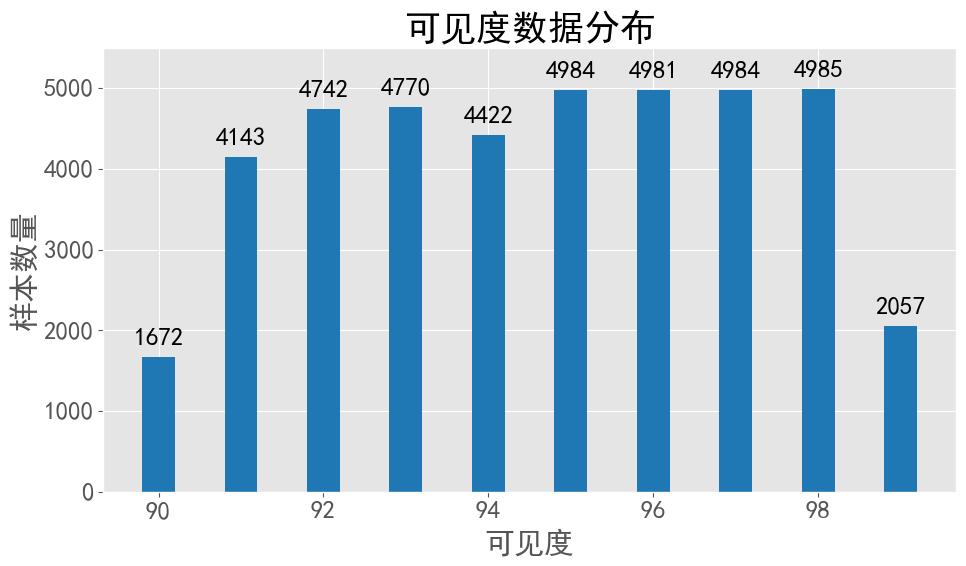

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 使用 ggplot 风格
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 18})
# 数据
visibility = [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
sample_counts = [1672, 4143, 4742, 4770, 4422, 4984, 4981, 4984, 4985, 2057]

# 设置图形大小
plt.figure(figsize=(10, 6))

# 创建柱状图，设置条形宽度为0.6（默认为0.8），颜色为蓝色
plt.bar(visibility, sample_counts, width=0.4, color='tab:blue')

# 添加标题和标签
plt.title('可见度数据分布')
plt.xlabel('可见度')
plt.ylabel('样本数量')
plt.ylim(0, 5500)
# 添加数值标签
for i, count in enumerate(sample_counts):
    plt.text(visibility[i], count + 100, str(count),ha='center', va='bottom')

# 优化布局
plt.tight_layout()
# plt.grid()
# 显示图形
plt.show()